In [47]:
# K-평균 클러스터링 예제

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터셋 로드
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

#X = iris_df.drop('label', axis=1)
#y = iris_df['label']
#X = iris_df.iloc[:, :-1]
X = iris_df.iloc[:, :4]
#y = iris_df.iloc[:, -1]

In [38]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [39]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:
iris_df['label'].unique()

array([0, 1, 2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


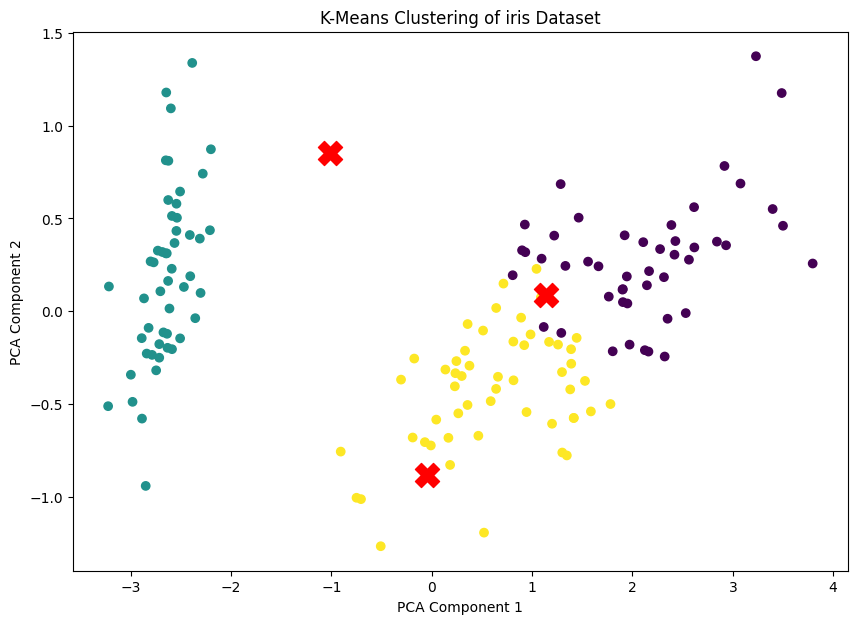

In [49]:
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# 예측
y_pred = kmeans.predict(X_scaled)

# 예측 결과 출력
print(y_pred)

# 클러스터링 결과 시각화 (PCA를 사용하여 2차원으로 축소)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of iris Dataset')
plt.show()


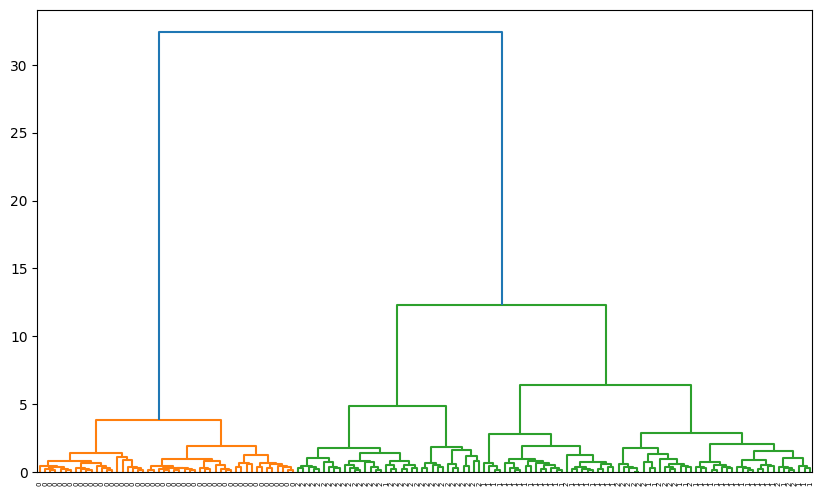

In [56]:
# 계층적 군집 분석 예제

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 데이터셋 로드
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
            labels=iris.target)
plt.show()

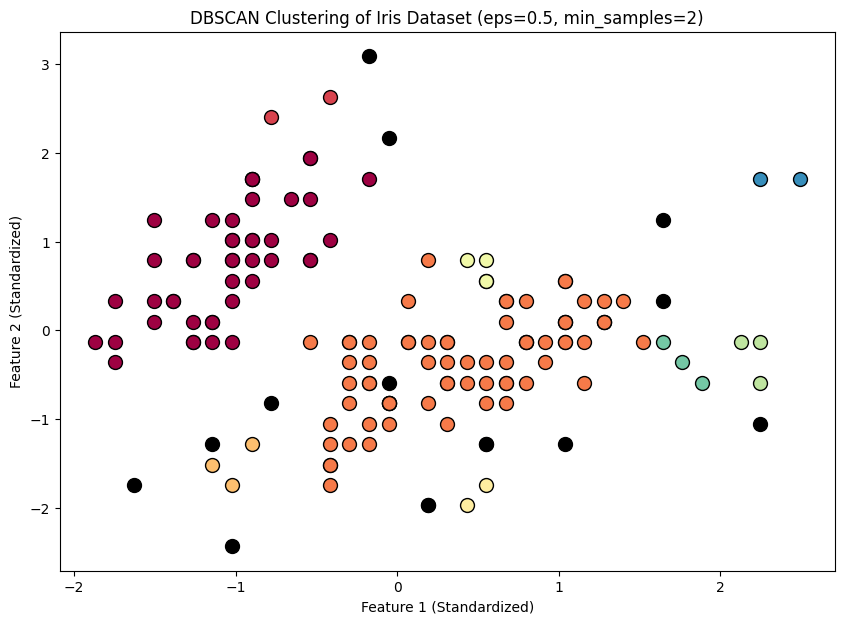

In [57]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 시각화 (첫 번째 두 특징 공간 사용)
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # 노이즈는 검정색으로 표시

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering of Iris Dataset (eps=0.5, min_samples=2)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

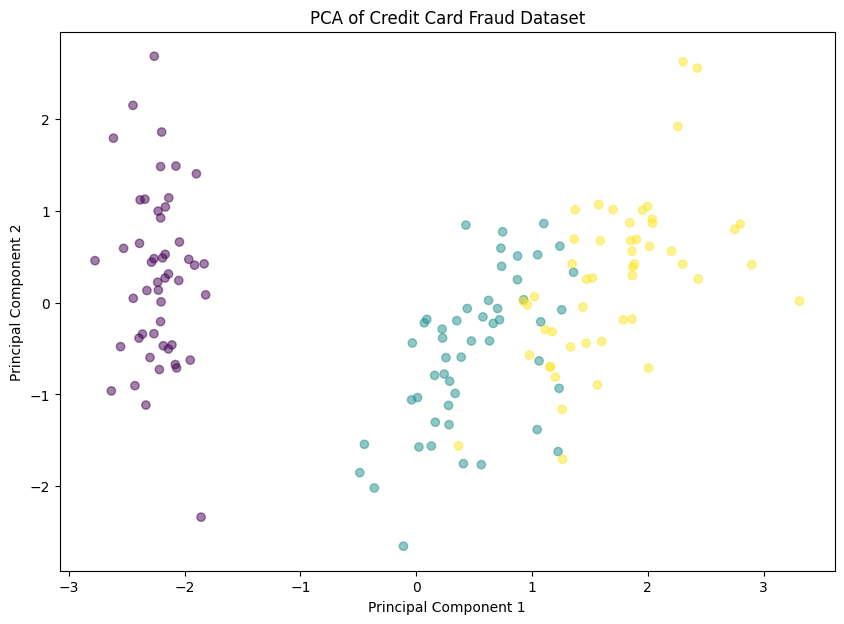

In [59]:
# 주성분 분석 (PCA) 예제

# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of iris Dataset')
plt.show()


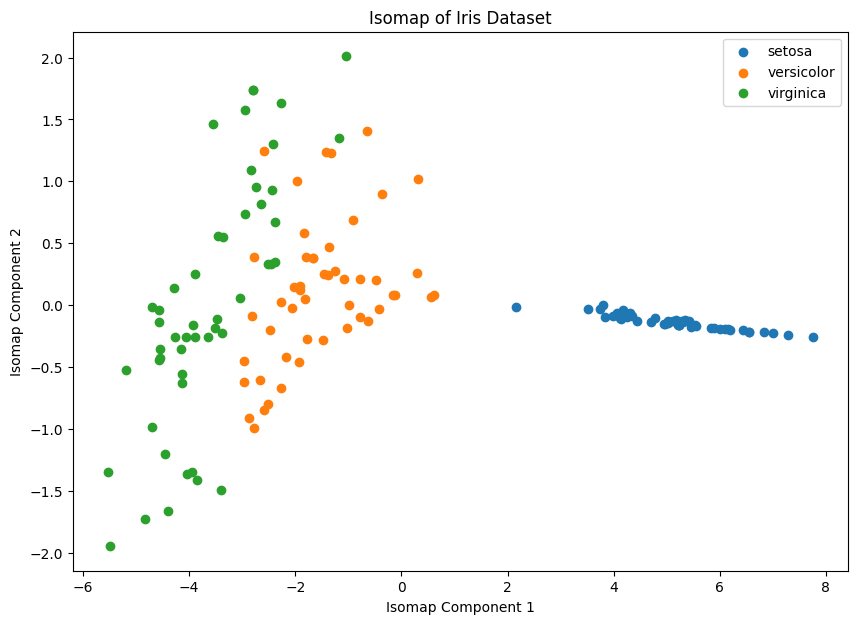

In [60]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isomap 적용
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)

# Isomap 결과 시각화
plt.figure(figsize=(10, 7))
for target in np.unique(y):
    plt.scatter(X_isomap[y == target, 0], X_isomap[y == target, 1], label=iris.target_names[target])
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap of Iris Dataset')
plt.legend()
plt.show()

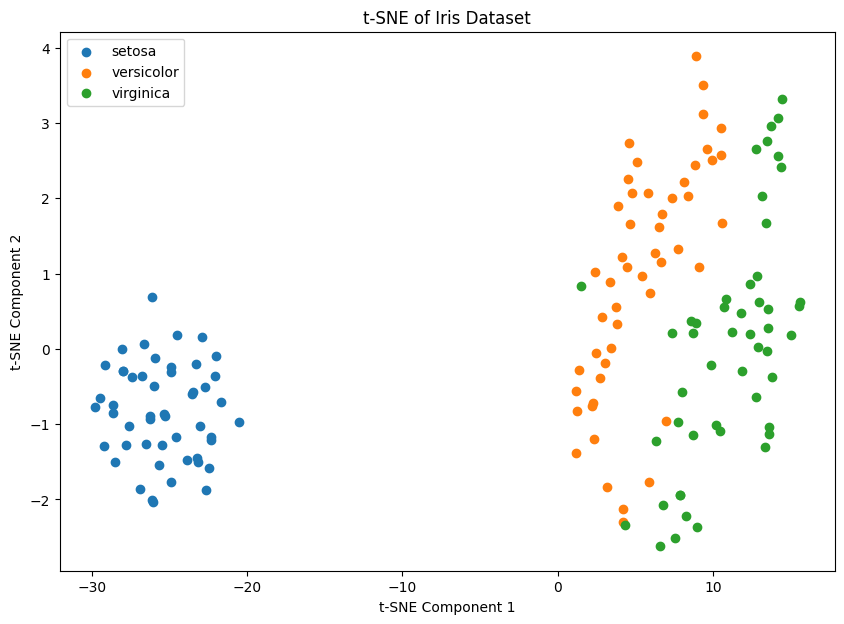

In [61]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE 결과 시각화
plt.figure(figsize=(10, 7))
for target in np.unique(y):
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=iris.target_names[target])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.show()